# Data science pipeline: pandas, seaborn, scikit-learn

## Agenda
 - How do I use the pandas library to read data into Python?
 - How do I use the seaborn library to visualize data?
 - What is linear regression, and how does it work?
 - How do I train and interpret a linear regression model in scikit-learn?
 - What are some evaluation metrics for regression problems?
 - How do I choose which features to include in my model?

### Types of supervised learning
 - Classification: Predict a categorical response
 - Regression: Predict a continuous response

In [1]:
# conventional way to import pandas
import pandas as pd

In [2]:
# read CSV file from the 'data' subdirectory using a relative path
data = pd.read_csv('data/Advertising.csv', index_col=0)

# display the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
# display the last 5 rows
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [4]:
# check the shape of the DataFrame (rows, columns)
data.shape

(200, 4)

### What are the features?

 - TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
 - Radio: advertising dollars spent on Radio
 - Newspaper: advertising dollars spent on Newspaper
 
### What is the response?
 - Sales: sales of a single product in a given market (in thousands of items)
   
   
### What else do we know?
 - Because the response variable is continuous, this is a regression problem.
 - There are 200 observations (represented by the rows), and each observation is a single market.

## Visualizing data using seaborn

In [5]:
# conventional way to import seaborn
import seaborn as sns

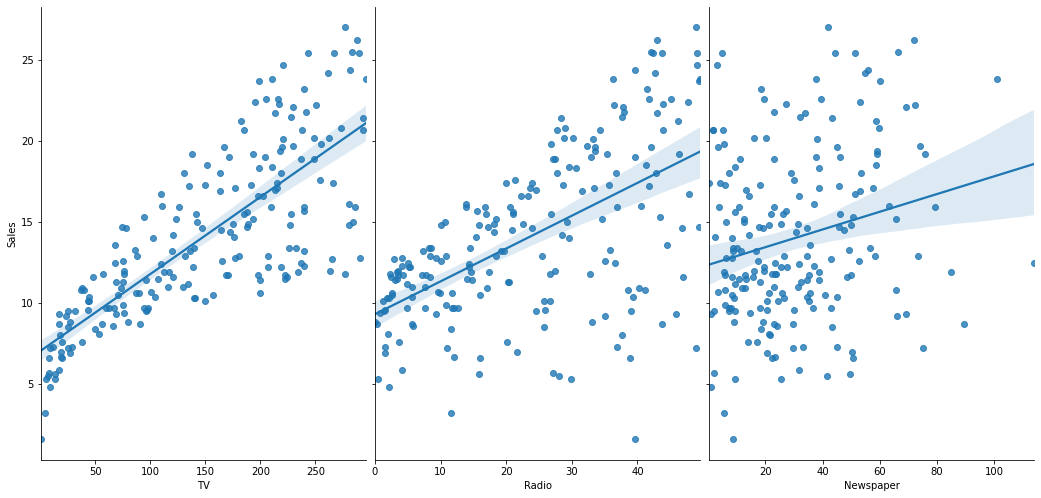

In [6]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=7, aspect=0.7, kind='reg', diag_kind = None)

## Linear regression
Pros: fast, no tuning required, highly interpretable, well-understood

Cons: unlikely to produce the best predictive accuracy (presumes a linear relationship between the features and response)

### Form of linear regression
    𝑦=𝛽0+𝛽1𝑥1+𝛽2𝑥2+...+𝛽𝑛𝑥𝑛
 - 𝑦 is the response
 - 𝛽0 is the intercept
 - 𝛽1 is the coefficient for 𝑥1 (the first feature)
 - 𝛽𝑛 is the coefficient for 𝑥𝑛 (the nth feature)

In this case:

    𝑦=𝛽0+𝛽1×𝑇𝑉+𝛽2×𝑅𝑎𝑑𝑖𝑜+𝛽3×𝑁𝑒𝑤𝑠𝑝𝑎𝑝𝑒𝑟

The 𝛽 values are called the model coefficients. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

### Preparing X and y using pandas
 - scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
 - However, pandas is built on top of NumPy.
 - Thus, X can be a pandas DataFrame and y can be a pandas Series!

In [7]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# equivalent command to do this in one line
X = data[['TV', 'Radio', 'Newspaper']]

# print the first 5 rows
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [8]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [9]:
# select a Series from the DataFrame
y = data['Sales']

# equivalent command that works if there are no spaces in the column name
y = data.Sales

# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [10]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


## Splitting X and y into training and testing sets

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [12]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


In [13]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression()

### Interpreting model coefficients

In [14]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [15]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('TV', 0.04656456787415029),
 ('Radio', 0.17915812245088839),
 ('Newspaper', 0.003450464711180378)]

    𝑦=2.88+0.0466×𝑇𝑉+0.179×𝑅𝑎𝑑𝑖𝑜+0.00345×𝑁𝑒𝑤𝑠𝑝𝑎𝑝𝑒𝑟
 
How do we interpret the TV coefficient (0.0466)?

 - For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending is associated with a 0.0466   "unit" increase in Sales.
 - Or more clearly: For a given amount of Radio and Newspaper ad spending, an additional $1,000 spent on TV ads is associated with an increase in sales of 46.6 items.
Important notes:

This is a statement of association, not causation.
If an increase in TV ad spending was associated with a decrease in sales, 𝛽1 would be negative.

### Making predictions

In [16]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

We need an evaluation metric in order to compare our predictions with the actual values!

### Model evaluation metrics for regression
Evaluation metrics for classification problems, such as accuracy, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Let's create some example numeric predictions, and calculate three common evaluation metrics for regression problems:

In [17]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [18]:
# calculate MAE by hand
print((10 + 0 + 20 + 10)/4.)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [19]:
# calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4.)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [20]:
# calculate RMSE by hand
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


Comparing these metrics:

 - MAE is the easiest to understand, because it's the average error.
 - MSE is more popular than MAE, because MSE "punishes" larger errors.
 - RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

### Computing the RMSE for our Sales predictions

In [21]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.404651423032895


### Feature selection
Does Newspaper "belong" in our model? In other words, does it improve the quality of our predictions?

Let's remove it from the model and check the RMSE!

In [22]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382886


The RMSE decreased when we removed Newspaper from the model. (Error is something we want to minimize, so a lower number for RMSE is better.) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.